In [ ]:
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
import string 

from wordcloud import WordCloud, STOPWORDS

sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_01 = pd.read_csv('/content/gdrive/MyDrive/STUDIO /Public_square_clean1000.csv', na_values = 'n/a', usecols= ['section-review-text'])
pd.options.display.max_columns = None
df_01

,section-review-text
0,As beautiful mystic and alive as always placa ...
1,Nice place to walk. You can go walking through...
2,Big square around town area. So many pigeon 🐦 ...
3,Lovely party of the city. Very nice and not so...
4,"shopping center, come here, bring your money e..."
...,...
925,What a beautiful part of the world. Must visi...
926,A nice place. Take a walk to admire everything.
927,"Beautiful, clean and happening place to visit ..."
928,Very good place


In [ ]:
# add new column 
df_01["name"] = "Placa de Catalunia"
df_01.to_csv('/content/gdrive/MyDrive/STUDIO /Public_square_clean1000.csv', index=False)
df_01


,section-review-text,name
0,As beautiful mystic and alive as always placa ...,Placa de Catalunia
1,Nice place to walk. You can go walking through...,Placa de Catalunia
2,Big square around town area. So many pigeon 🐦 ...,Placa de Catalunia
3,Lovely party of the city. Very nice and not so...,Placa de Catalunia
4,"shopping center, come here, bring your money e...",Placa de Catalunia
...,...,...
925,What a beautiful part of the world. Must visi...,Placa de Catalunia
926,A nice place. Take a walk to admire everything.,Placa de Catalunia
927,"Beautiful, clean and happening place to visit ...",Placa de Catalunia
928,Very good place,Placa de Catalunia


In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(txt):
    txt_nopunt = "".join( [c for c in txt if c not in string.punctuation] )
    return txt_nopunt

In [ ]:
df_01['section-review-text'] = df_01['section-review-text'].apply( lambda x: remove_punctuation(x))
pd.set_option('display.max_colwidth', 100) #increase width
df_01

,section-review-text,name
0,As beautiful mystic and alive as always placa Catalunya is still one of the most iconic place in...,Placa de Catalunia
1,Nice place to walk You can go walking through the Rambla to arrive at Mare Magnum and the sea 🍁☘...,Placa de Catalunia
2,Big square around town area So many pigeon 🐦 wow I love it People feeding those birds absolutely...,Placa de Catalunia
3,Lovely party of the city Very nice and not so crowded Loved being at it Everything is close to us,Placa de Catalunia
4,shopping center come here bring your money enjoy some of restaurant starbucks Hard Rock apple st...,Placa de Catalunia
...,...,...
925,What a beautiful part of the world Must visit Cartegena,Placa de Catalunia
926,A nice place Take a walk to admire everything,Placa de Catalunia
927,Beautiful clean and happening place to visit and spend some quality and leisure time,Placa de Catalunia
928,Very good place,Placa de Catalunia


In [ ]:
df_combined1 = df_01.groupby('name')['section-review-text'].apply(' '.join).reset_index()

In [ ]:
df_combined1.to_pickle("df1.pkl") # pickle data for later use - placa de catalunia

In [ ]:
stopwords = set(STOPWORDS)

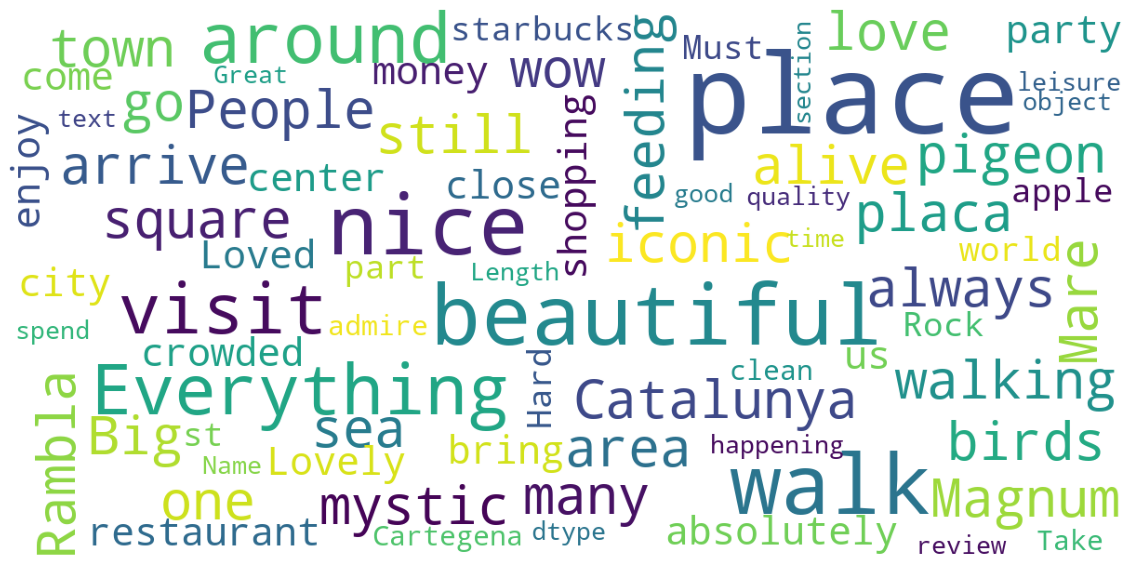

In [ ]:
def myworldcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))


    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title,fintsize = 20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

myworldcloud(df_01['section-review-text'].dropna())

# Placa de Gaudi

In [ ]:
df_02 = pd.read_csv('/content/gdrive/MyDrive/STUDIO /Plaça de Gaudi.csv', na_values = 'n/a', usecols= ['section-review-text'])
pd.options.display.max_columns = None
df_02

,section-review-text
0,"Church is really nice and special, but due to construction work a bit hard to take good pictures"
1,Perhaps one of the best views of the Basilica de la Sagrada Familia. There is a pond in the midd...
2,Beautiful place to take rememberable pictures!
3,A MUST see when visiting Barcelona. Our friend's daughter had her wedding here. Beautiful place ...
4,Plaça de Gaudí/ Plaza de Gaudi (Gaudi Park) is a picturesque little known park by tourists wher...
...,...
299,(Translated by Google) Dogs are destroying all gardens etc. etc. a shame would tell the mayor pl...
300,"(Translated by Google) Very spacious, beautiful views and perfect to be with the children\n\n(Or..."
301,"(Translated by Google) It is the best place to take photos of the holy family, people respect an..."
302,"(Translated by Google) Thankfully, I was able to find this place, the photos were simply amazing..."


In [ ]:
# add new column 
df_02["name"] = "Placa de Gaudi"
df_02.to_csv('/content/gdrive/MyDrive/STUDIO /Plaça de Gaudi.csv', index=False)
df_02

,section-review-text,name
0,"Church is really nice and special, but due to construction work a bit hard to take good pictures",Placa de Gaudi
1,Perhaps one of the best views of the Basilica de la Sagrada Familia. There is a pond in the midd...,Placa de Gaudi
2,Beautiful place to take rememberable pictures!,Placa de Gaudi
3,A MUST see when visiting Barcelona. Our friend's daughter had her wedding here. Beautiful place ...,Placa de Gaudi
4,Plaça de Gaudí/ Plaza de Gaudi (Gaudi Park) is a picturesque little known park by tourists wher...,Placa de Gaudi
...,...,...
299,(Translated by Google) Dogs are destroying all gardens etc. etc. a shame would tell the mayor pl...,Placa de Gaudi
300,"(Translated by Google) Very spacious, beautiful views and perfect to be with the children\n\n(Or...",Placa de Gaudi
301,"(Translated by Google) It is the best place to take photos of the holy family, people respect an...",Placa de Gaudi
302,"(Translated by Google) Thankfully, I was able to find this place, the photos were simply amazing...",Placa de Gaudi


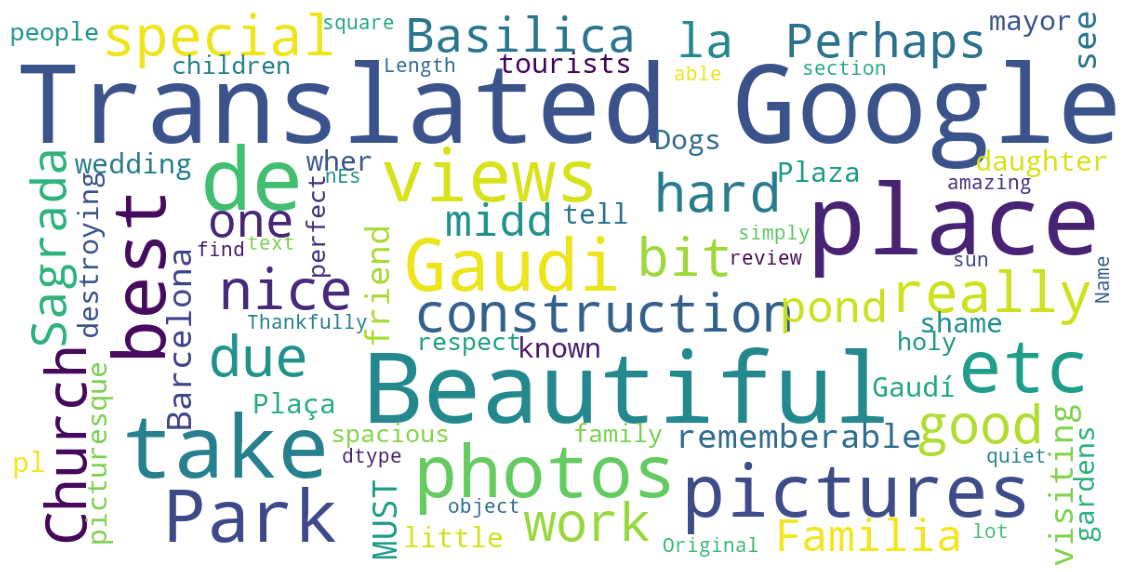

In [ ]:
def myworldcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))


    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title,fintsize = 20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

myworldcloud(df_02['section-review-text'].dropna())

# Plaça de George Orwell

In [ ]:
df_03 = pd.read_csv('/content/gdrive/MyDrive/STUDIO /Plaça de George Orwell.csv', na_values = 'n/a', usecols= ['section-review-text'])
pd.options.display.max_columns = None
df_03

,section-review-text
0,Sometimes a weird place but likable. Very Barcelona.
1,Plaza George Orwell ore famous as Plaza Tripi. Ora called like that because it used to be a drug...
2,Five stars just because it exists. Orwellian politics much?\n\nUnfortunately is under repairs at...
3,Great place full of terraces for canas in the sun
4,Amazing place in one of the Gotic hearts!!! Must be good as it is dedicated to one of the very b...
...,...
318,(Translated by Google) A pleasant place like any of Barcelona\n\n(Original)\nמקום נעים כמו כל בר...
319,(Translated by Google) In the center of the square is a large-scale reproduction of a surrealist...
320,(Translated by Google) Nothing special\n\n(Original)\nNada del otro mundo
321,(Translated by Google) A small area with a cafe and a playground. It is popular with the local p...


In [ ]:
# add new column 
df_03["name"] = "Placa de Gaudi"
df_03.to_csv('/content/gdrive/MyDrive/STUDIO /Plaça de George Orwell.csv', index=False)
df_03

,section-review-text,name
0,Sometimes a weird place but likable. Very Barcelona.,Placa de Gaudi
1,Plaza George Orwell ore famous as Plaza Tripi. Ora called like that because it used to be a drug...,Placa de Gaudi
2,Five stars just because it exists. Orwellian politics much?\n\nUnfortunately is under repairs at...,Placa de Gaudi
3,Great place full of terraces for canas in the sun,Placa de Gaudi
4,Amazing place in one of the Gotic hearts!!! Must be good as it is dedicated to one of the very b...,Placa de Gaudi
...,...,...
318,(Translated by Google) A pleasant place like any of Barcelona\n\n(Original)\nמקום נעים כמו כל בר...,Placa de Gaudi
319,(Translated by Google) In the center of the square is a large-scale reproduction of a surrealist...,Placa de Gaudi
320,(Translated by Google) Nothing special\n\n(Original)\nNada del otro mundo,Placa de Gaudi
321,(Translated by Google) A small area with a cafe and a playground. It is popular with the local p...,Placa de Gaudi


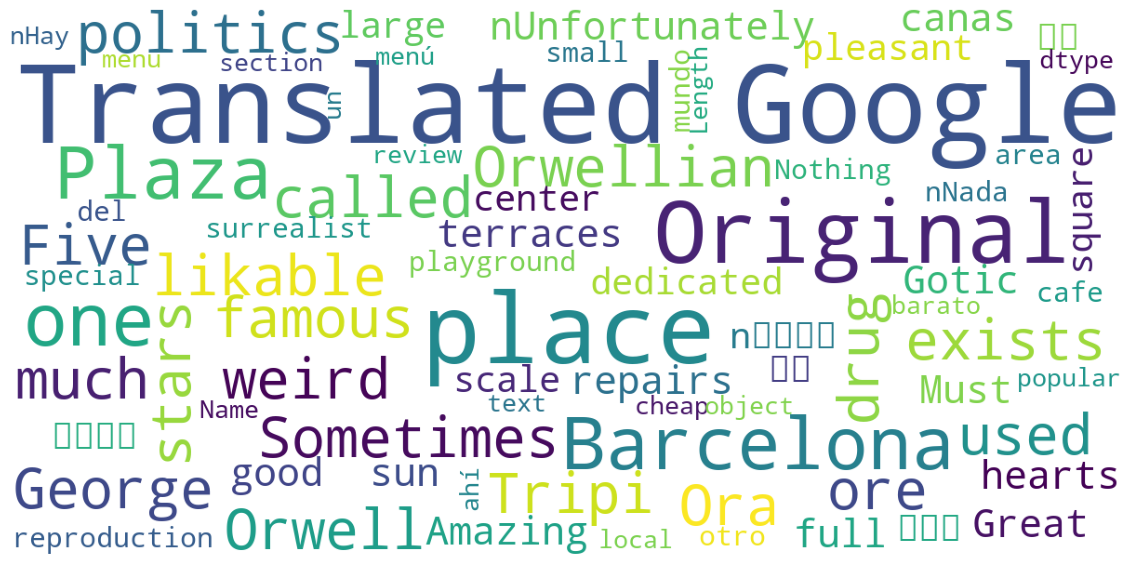

In [ ]:
def myworldcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))


    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title,fintsize = 20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

myworldcloud(df_03['section-review-text'].dropna())

# Plaça de Tetuan

In [ ]:
df_04= pd.read_csv('/content/gdrive/MyDrive/STUDIO /Plaça de Tetuan.csv', na_values = 'n/a', usecols= ['section-review-text'])
pd.options.display.max_columns = None
df_04

,section-review-text
0,Great place! Good for chill or take your dog for stretch! You can zoot and have a can there! It'...
1,Easy to find even if you just keep walking. The monument is majestic and it's worth seeing in th...
2,Lovely square in the middle of paseo San Juan.
3,Beautiful and calm park with amazing architecture. I have really enjoyed a walk there. Fountain ...
4,I liked the area and the space it had for the sculpture. The figures are really well done. My on...
...,...
298,(Translated by Google) Within the layout of the great via it grants a small homogeneous space as...
299,(Translated by Google) A place where I would repeat many times\n\n(Original)\nUn lugar donde rep...
300,(Translated by Google) In this year 2017 I have had two accidents at work. He goes every day to ...
301,(Translated by Google) It has no charm.\nPlace of visit: Plaça Tetuan\nDate of visit: 07/22/2017...


In [ ]:
# add new column 
df_04["name"] = "Placa de Gaudi"
df_04.to_csv('/content/gdrive/MyDrive/STUDIO /Plaça de Tetuan.csv', index=False)
df_04

,section-review-text,name
0,Great place! Good for chill or take your dog for stretch! You can zoot and have a can there! It'...,Placa de Gaudi
1,Easy to find even if you just keep walking. The monument is majestic and it's worth seeing in th...,Placa de Gaudi
2,Lovely square in the middle of paseo San Juan.,Placa de Gaudi
3,Beautiful and calm park with amazing architecture. I have really enjoyed a walk there. Fountain ...,Placa de Gaudi
4,I liked the area and the space it had for the sculpture. The figures are really well done. My on...,Placa de Gaudi
...,...,...
298,(Translated by Google) Within the layout of the great via it grants a small homogeneous space as...,Placa de Gaudi
299,(Translated by Google) A place where I would repeat many times\n\n(Original)\nUn lugar donde rep...,Placa de Gaudi
300,(Translated by Google) In this year 2017 I have had two accidents at work. He goes every day to ...,Placa de Gaudi
301,(Translated by Google) It has no charm.\nPlace of visit: Plaça Tetuan\nDate of visit: 07/22/2017...,Placa de Gaudi


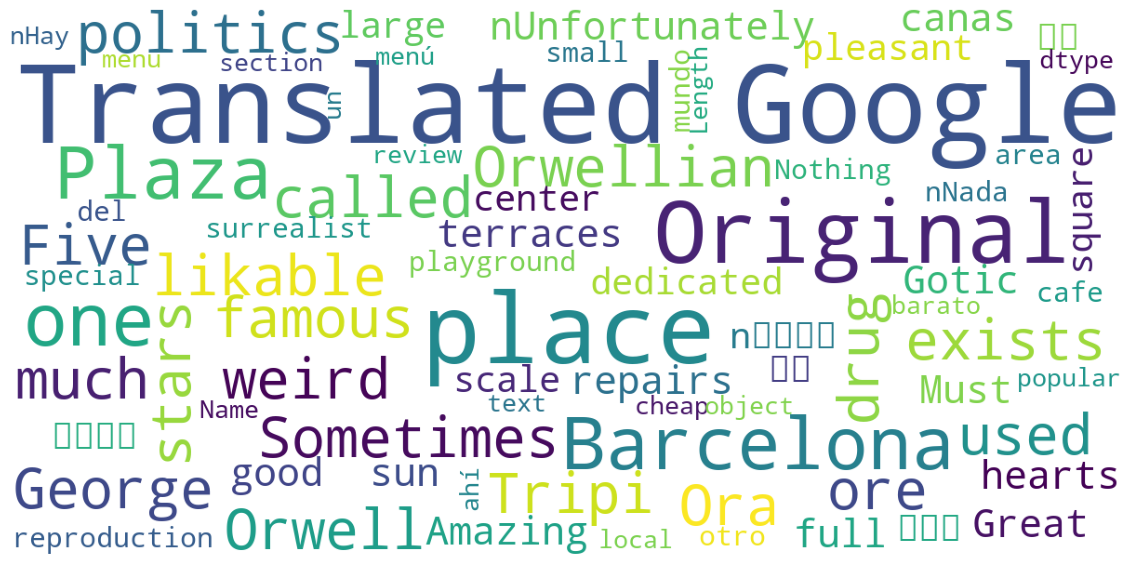

In [ ]:
def myworldcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    ).generate(str(data))


    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title,fintsize = 20)
        fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud)
    plt.show()

myworldcloud(df_03['section-review-text'].dropna())